<a href="https://colab.research.google.com/github/Zorro-De-La-Vega/NLP/blob/main/Week_3_Assignment_Submission_NLP_Zero_To_Hero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Loading and Understanding the Dataset

In [1]:
# Importing necessary libraries
import pandas as pd

# Loading the dataset
url = "https://raw.githubusercontent.com/Zorro-De-La-Vega/Datasources-For-NLP/main/IMDB%20Dataset.csv"
df = pd.read_csv(url, encoding='ISO-8859-1')

# Displaying the first few rows of the dataset
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Explaining the Columns
Text: Contains the actual text of social media posts.

Sentiment: Contains the sentiment label (Positive, Negative, or Neutral).

In [2]:
# Handling missing values and converting labels to binary format
df.dropna(subset=['review'], inplace=True)
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Step 2: Data Preprocessing — The Key to High-Performance Models

In [3]:
import re

# Cleaning the review data
def clean_text(review):
    review = review.lower()  # Convert to lowercase
    review = re.sub(r'[^a-z\s]', '', review)  # Remove special characters
    return review

# Applying the cleaning function to the dataset
df['review'] = df['review'].apply(clean_text)
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production br br the filmin...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically theres a family where a little boy j...,0
4,petter matteis love in the time of money is a ...,1


# Step 3: Text Vectorization with TF-IDF

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initializing the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')

# Transforming the text data
X_tfidf = tfidf_vectorizer.fit_transform(df['review'])
y = df['sentiment']

# Step 4: Splitting the Data for Training and Testing

In [5]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [6]:
print(X_tfidf.shape)
print(y.shape)

(50000, 5000)
(50000,)


# Step 5: Building and Evaluating Classification Models

# 5.1 Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.87      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



# 5.2 Support Vector Machine (SVM)

In [8]:
from sklearn.svm import SVC

# SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred_svm = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.87      0.90      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



# 5.3 XGBoost

In [9]:
from xgboost import XGBClassifier

# XGBoost Model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      4961
           1       0.84      0.88      0.86      5039

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



# Step 6: Confusion Matrix — Understanding the Results
What to Look For in a Confusion Matrix?

**True Positives (TP)**: Correctly predicted positive observations.

**True Negatives (TN)**: Correctly predicted negative observations.

**False Positives (FP)**: Incorrectly predicted as positive when it was actually negative.

**False Negatives (FN)**: Incorrectly predicted as negative when it was actually positive.

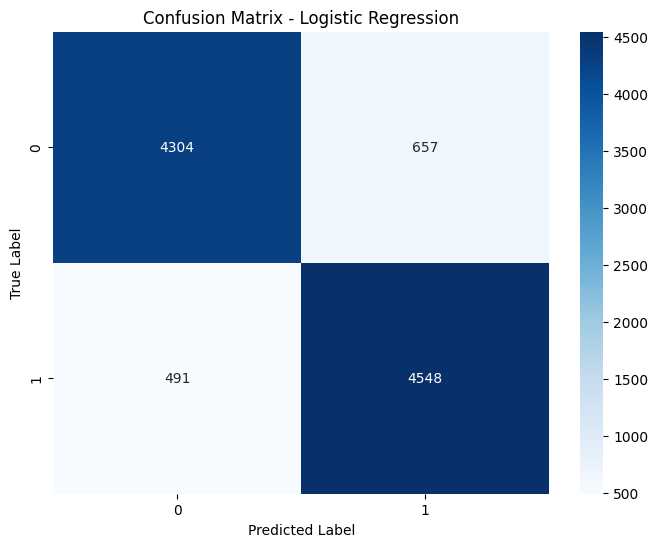

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generating and plotting the confusion matrix for the Logistic Regression model
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()